In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
y_list=[]

In [3]:
def get_noise_dep(p_m, p_g):
    error_m = pauli_error([('X',p_m),('I',1-p_m)])
    error_g1 = depolarizing_error(p_g,1)
    error_g2 = error_g1.tensor(error_g1)
    
    noise_model = NoiseModel()
    
    # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_m, "measure")
    # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_g1, ["h","x","id"])
    # two qubit gate error is applied to cx gates
    noise_model.add_all_qubit_quantum_error(error_g2, ["cx"])
    return noise_model

In [4]:
for z in range(20):
    bob_bits=[]
    from qiskit.tools.monitor import backend_monitor
    import matplotlib.pyplot as plt
    from qiskit.tools.visualization import circuit_drawer
    from qiskit import *
    from qiskit.visualization import plot_histogram
    from random import randrange, seed, sample
    from sys import argv, exit
    import random
    #data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
    data=50
    ##########################################################################
    h=0
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    print(digits)
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    print('\n')
    #n = len(digits)
    
    ##########################################################################
    bob_bits=[]
    from random import choice
    m=0
    n=50
    for i in range(n):
        m=m+10
        #print("No of identity Gate:",m)
        if digits[i] == 0:
            q = QuantumRegister(1, 'q')
            c = ClassicalRegister(1, 'c')
            qc = QuantumCircuit(q, c)
            qc.barrier()
            qc.h(0)
            qc.barrier()
            for j in range(m):
                qc.id(0)
                qc.barrier()
            qc.h(0)
            qc.barrier()
            qc.measure(q[0], c[0])
            #print(qc)
            # Perform a noise simulation
            backend = Aer.get_backend('qasm_simulator')
            counts = backend.run(qc,Aer.get_backend('qasm_simulator'),shots=8192,noise_model=get_noise_dep(0.036,0.00036)).result().get_counts()
            #counts = result.get_counts(qc)
            %matplotlib inline
            #print(qc)
            #qc.draw(output='mpl')
            #plt.show()
            #print(counts)
            #plot_histogram(counts)
            
            itemMaxValue = max(counts.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            # Iterate over all the items in dictionary to find keys with max value
            for key, value in counts.items():
                if value == itemMaxValue[1]:
                    
                    bob_bits.append(value/8192)
    y_list.append(bob_bits)
    print(bob_bits)
    print("")
print(y_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[0.9635009765625, 0.961181640625, 0.9613037109375, 0.956298828125, 0.9515380859375, 0.9542236328125, 0.95458984375, 0.949951171875, 0.948486328125, 0.94140625, 0.9432373046875, 0.944580078125, 0.9449462890625, 0.9415283203125, 0.93701171875, 0.9365234375, 0.9351806640625, 0.9366455078125, 0.9329833984375, 0.9283447265625, 0.9296875, 0.926513671875, 0.929443359375, 0.923583984375, 0.9195556640625, 0.9232177734375, 0.9210205078125, 0.921875, 0.91455078125, 0.9169921875, 0.9140625, 0.91357421875, 0.9130859375, 0.9112548828125, 0.90966796875, 0.91259765625, 0.904541015625, 0.9012451171875, 0.9017333984375, 0.90185546875, 0.904541015625, 0.892333984375, 0.8995361328125, 0.896484375, 0.893310546875, 0.893798828125, 0.889404296875, 0.894287109375, 0.8914794921875, 0.88818359375]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 20 time Average

In [7]:
x =[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
y=y_list


## Mean

In [8]:
from statistics import mean
a = y

print(*map(mean, zip(*a)))



0.961834716796875 0.96029052734375 0.959222412109375 0.957647705078125 0.95540771484375 0.953936767578125 0.95242919921875 0.950286865234375 0.948883056640625 0.94627685546875 0.945953369140625 0.945513916015625 0.941314697265625 0.941656494140625 0.939080810546875 0.937994384765625 0.93525390625 0.935565185546875 0.932366943359375 0.93211669921875 0.929736328125 0.927105712890625 0.9283447265625 0.92535400390625 0.92359619140625 0.9223876953125 0.920111083984375 0.92056884765625 0.91741943359375 0.91571044921875 0.914593505859375 0.913983154296875 0.912225341796875 0.91072998046875 0.908758544921875 0.90775146484375 0.9058349609375 0.9046630859375 0.9036376953125 0.900579833984375 0.900421142578125 0.8983154296875 0.897589111328125 0.89774169921875 0.89383544921875 0.89403076171875 0.89112548828125 0.89002685546875 0.888067626953125 0.887615966796875


## Map Plotting

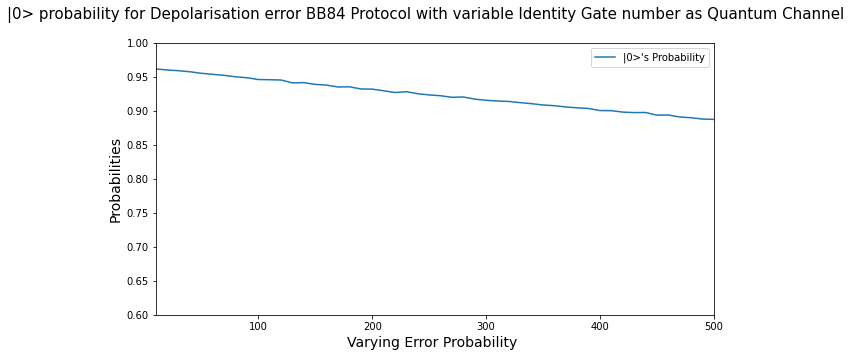

<Figure size 576x360 with 0 Axes>

In [10]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|0> probability for Depolarisation error BB84 Protocol with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 500)
ax.set_ylim(0.6,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y1 = [0.961834716796875,0.96029052734375,0.959222412109375,0.957647705078125,0.95540771484375,0.953936767578125,0.95242919921875,0.950286865234375,0.948883056640625,0.94627685546875,0.945953369140625,0.945513916015625,0.941314697265625,0.941656494140625,0.939080810546875,0.937994384765625,0.93525390625,0.935565185546875,0.932366943359375,0.93211669921875,0.929736328125,0.927105712890625,0.9283447265625,0.92535400390625,0.92359619140625,0.9223876953125,0.920111083984375,0.92056884765625,0.91741943359375,0.91571044921875,0.914593505859375,0.913983154296875,0.912225341796875,0.91072998046875,0.908758544921875,0.90775146484375,0.9058349609375,0.9046630859375,0.9036376953125,0.900579833984375,0.900421142578125,0.8983154296875,0.897589111328125,0.89774169921875,0.89383544921875,0.89403076171875,0.89112548828125,0.89002685546875,0.888067626953125,0.887615966796875]
x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]

# plotting the line 2 points
ax.plot(x1, y1, label = "|0>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()

In [ ]:
[[969, 965, 960, 957, 967, 977, 964, 957, 953, 967, 960, 959, 966, 978, 967, 973, 969, 958, 961, 974, 950, 965, 959, 962, 964, 960, 971, 960, 973, 953, 956, 968, 963, 972, 965, 961, 960, 958, 960, 960, 958, 965, 968, 962, 964, 965, 973, 954, 958, 963],
[959, 962, 964, 962, 950, 961, 966, 961, 963, 962, 956, 963, 965, 959, 967, 968, 968, 970, 963, 964, 971, 964, 959, 973, 958, 964, 963, 947, 951, 964, 956, 952, 963, 961, 964, 959, 962, 966, 973, 966, 968, 975, 962, 964, 958, 960, 970, 950, 958, 959],
[965, 960, 963, 960, 960, 976, 966, 966, 969, 960, 974, 967, 966, 972, 962, 960, 972, 963, 965, 955, 967, 966, 962, 968, 961, 966, 972, 945, 958, 967, 959, 959, 965, 964, 965, 970, 971, 965, 959, 963, 959, 962, 963, 968, 958, 959, 966, 968, 963, 962],
[963, 967, 971, 955, 966, 966, 968, 970, 960, 955, 958, 967, 952, 955, 964, 959, 958, 971, 961, 964, 965, 973, 956, 954, 965, 958, 969, 970, 971, 960, 974, 960, 963, 971, 962, 960, 953, 968, 959, 960, 965, 953, 962, 961, 961, 961, 969, 957, 954, 959],
[969, 968, 959, 962, 965, 967, 964, 968, 966, 971, 964, 964, 966, 957, 958, 959, 967, 953, 958, 969, 962, 965, 971, 962, 962, 958, 960, 957, 968, 958, 969, 961, 971, 969, 973, 971, 965, 953, 972, 956, 955, 972, 975, 959, 958, 973, 959, 957, 963, 968],
[970, 965, 969, 965, 963, 967, 972, 964, 966, 961, 965, 968, 961, 974, 959, 954, 964, 966, 957, 963, 971, 972, 952, 962, 971, 964, 964, 967, 972, 957, 964, 965, 969, 957, 972, 964, 970, 957, 969, 973, 970, 948, 964, 967, 959, 965, 961, 974, 966, 972],
[967, 971, 967, 974, 962, 957, 961, 970, 962, 951, 964, 966, 973, 966, 958, 967, 962, 961, 962, 970, 963, 964, 966, 958, 963, 970, 959, 967, 958, 968, 966, 972, 965, 969, 963, 976, 952, 967, 969, 965, 968, 975, 959, 968, 962, 952, 962, 963, 962, 960],
[963, 967, 959, 961, 969, 968, 966, 963, 962, 974, 963, 970, 968, 960, 965, 961, 964, 961, 955, 967, 959, 967, 966, 970, 960, 958, 963, 953, 958, 964, 972, 961, 967, 963, 963, 964, 973, 971, 952, 960, 959, 965, 952, 960, 963, 959, 962, 964, 966, 961],
[967, 959, 959, 956, 961, 961, 971, 965, 955, 962, 970, 962, 965, 962, 963, 959, 955, 956, 964, 964, 963, 959, 964, 962, 966, 970, 966, 962, 963, 967, 968, 954, 966, 966, 962, 956, 966, 957, 955, 986, 955, 959, 961, 961, 968, 952, 962, 962, 962, 974],
[960, 968, 957, 969, 969, 970, 964, 963, 960, 956, 952, 974, 962, 959, 967, 958, 960, 966, 961, 964, 974, 971, 966, 961, 962, 964, 951, 959, 968, 956, 974, 964, 971, 964, 972, 963, 965, 959, 967, 941, 960, 969, 965, 964, 963, 972, 971, 962, 965, 965],
[972, 952, 963, 967, 959, 957, 963, 966, 967, 964, 968, 962, 960, 962, 955, 973, 965, 959, 969, 961, 969, 972, 963, 959, 962, 969, 970, 975, 967, 960, 967, 958, 956, 962, 962, 967, 970, 965, 957, 966, 972, 962, 958, 962, 966, 960, 961, 970, 961, 971],
[980, 966, 957, 965, 961, 966, 957, 967, 965, 965, 966, 960, 963, 967, 968, 957, 961, 957, 964, 955, 959, 969, 957, 965, 959, 964, 962, 955, 972, 960, 962, 961, 965, 958, 957, 960, 978, 957, 968, 957, 970, 966, 956, 955, 968, 961, 960, 955, 966, 962],
[966, 953, 954, 966, 964, 960, 964, 971, 958, 964, 965, 962, 978, 967, 957, 959, 970, 965, 964, 967, 966, 955, 961, 958, 962, 961, 967, 969, 966, 962, 965, 964, 959, 960, 967, 964, 968, 963, 968, 964, 971, 952, 968, 977, 966, 965, 971, 962, 970, 969],
[971, 966, 969, 958, 972, 965, 965, 962, 961, 958, 966, 968, 954, 963, 961, 967, 966, 970, 967, 957, 972, 962, 951, 962, 958, 960, 963, 965, 968, 970, 963, 961, 964, 963, 958, 971, 961, 970, 963, 961, 964, 965, 970, 960, 964, 958, 969, 969, 957, 969],
[971, 968, 971, 957, 971, 959, 969, 964, 971, 962, 970, 960, 953, 959, 962, 962, 967, 967, 961, 960, 961, 973, 958, 958, 969, 956, 958, 971, 970, 963, 961, 953, 964, 976, 968, 969, 963, 970, 958, 956, 956, 963, 961, 965, 964, 962, 954, 969, 953, 962],
[971, 959, 971, 964, 961, 968, 963, 965, 965, 967, 955, 981, 961, 948, 964, 969, 970, 959, 963, 964, 965, 967, 957, 961, 950, 972, 967, 965, 966, 949, 964, 963, 956, 962, 962, 968, 965, 965, 969, 963, 961, 964, 970, 960, 961, 960, 960, 967, 971, 969],
[952, 962, 963, 976, 970, 952, 968, 956, 964, 958, 964, 960, 970, 966, 966, 965, 963, 963, 958, 960, 959, 963, 957, 966, 962, 961, 965, 959, 961, 969, 967, 964, 956, 954, 967, 963, 959, 955, 963, 964, 962, 966, 963, 971, 945, 972, 961, 954, 964, 967],
[962, 965, 970, 959, 970, 975, 966, 966, 959, 958, 966, 959, 958, 963, 965, 970, 956, 965, 977, 965, 970, 956, 968, 971, 972, 955, 964, 957, 957, 966, 963, 961, 959, 971, 965, 965, 964, 962, 958, 956, 958, 964, 958, 963, 968, 969, 958, 964, 973, 959],
[976, 958, 968, 969, 953, 962, 954, 964, 969, 952, 962, 967, 958, 960, 955, 968, 966, 957, 962, 967, 962, 962, 970, 968, 954, 954, 963, 970, 960, 961, 967, 963, 961, 973, 965, 958, 952, 953, 961, 965, 966, 959, 971, 958, 967, 960, 974, 962, 965, 963],
[978, 977, 964, 961, 966, 958, 956, 979, 966, 970, 959, 967, 968, 964, 964, 976, 955, 954, 967, 974, 964, 963, 959, 968, 964, 976, 962, 962, 970, 959, 960, 965, 958, 965, 966, 966, 953, 951, 962, 963, 970, 956, 962, 962, 973, 970, 958, 963, 954, 970]]



## Sir's Code

        ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐»
   q_0: ┤ H ├─░─┤ I ├─░─┤ I ├─░─┤ I ├─░─┤ I ├─░─┤ I ├─░─┤ I ├─░─┤ I ├─░─┤ I ├»
        └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘»
meas: 1/═════════════════════════════════════════════════════════════════════»
                                                                             »
«         ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌─┐
«   q_0: ─░─┤ I ├─░─┤ I ├─░─┤ H ├─░─┤M├
«         ░ └───┘ ░ └───┘ ░ └───┘ ░ └╥┘
«meas: 1/════════════════════════════╩═
«                                    0 


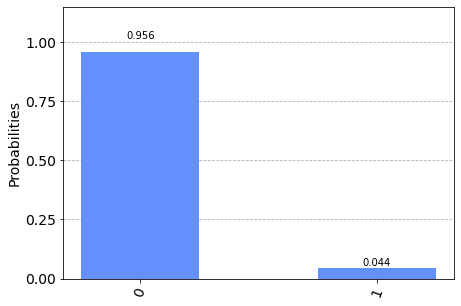

In [58]:
qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
for i in range(10):
    qc.i(0)
    qc.barrier()
qc.h(0)
qc.measure_all()
print(qc)

counts = execute(qc,Aer.get_backend('qasm_simulator'),noise_model=get_noise_dep(0.036,0.00036),shots=2048).result().get_counts()
plot_histogram(counts)

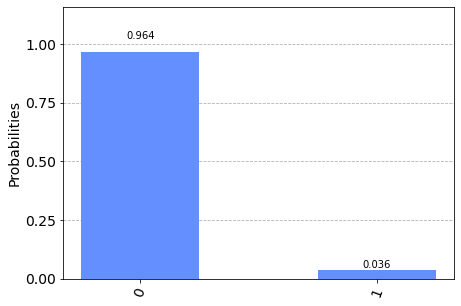

In [64]:
qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
for i in range(10000):
    qc.i(0)
    qc.barrier()
qc.h(0)
qc.measure_all()
#print(qc)

counts = execute(qc,Aer.get_backend('qasm_simulator'),noise_model=get_noise_dep(0.036,0.00036),shots=2048).result().get_counts()
plot_histogram(counts)

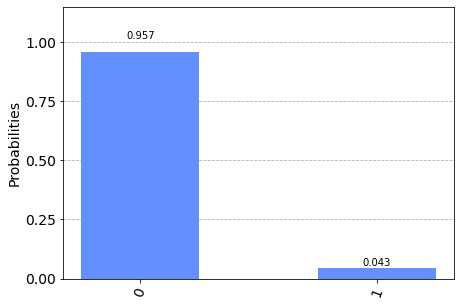

In [5]:
qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
for i in range(500):
    qc.i(0)
    qc.barrier()
qc.h(0)
qc.measure_all()
#print(qc)

counts = execute(qc,Aer.get_backend('qasm_simulator'),noise_model=get_noise_dep(0.036,0.00036),shots=2048).result().get_counts()
plot_histogram(counts)

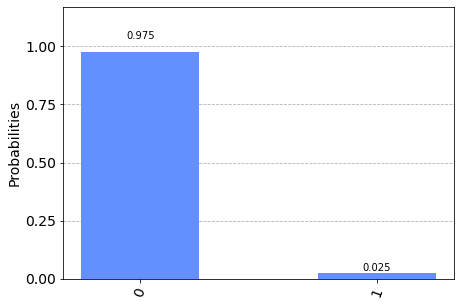

In [6]:
qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
for i in range(500):
    qc.i(0)
    qc.barrier()
qc.h(0)
qc.measure_all()
#print(qc)

counts = execute(qc,Aer.get_backend('qasm_simulator'),noise_model=get_noise_dep(0.036,0.00036),shots=1000).result().get_counts()
plot_histogram(counts)